$q(x) = q(x_1, x_2) = \sqrt{x_1^2 + 4} + \sqrt{x_2^2 + 4}$


**1. What is the minimizer and minimum function value of q(x) ?, Is the minimizer in unique ?, Is it local or global
minima ?, Is the function q(x) convex ?, explain each of them.**


The function $  q(x) = \sqrt{x_1^2 + 4} + \sqrt{x_2^2 + 4}$ is a sum of two square root functions. Let's analyze its properties:

1. **Minimizer and Minimum Function Value**:
   - The minimum value of  q(x) occurs when both $ \sqrt{x_1^2 + 4} $ and $ \sqrt{x_2^2 + 4} $ are minimized.
   - Since $ \sqrt{x^2 + 4} $ is minimized when  x = 0 , the minimum value of q(x) is $ q(0, 0) = \sqrt{4} + \sqrt{4} = 2 + 2 = 4 $
   - Therefore, the minimum value of  q(x) is 4, and it is achieved at  x = (0, 0)

2. **Uniqueness of Minimizer**:
   - The minimizer  x = (0, 0)  is unique because there is only one point in the domain of  q(x)  where both $ \sqrt{x_1^2 + 4} $ and $ \sqrt{x_2^2 + 4} $ are minimized simultaneously.

3. **Local or Global Minima**:
   - Since the function  q(x)  achieves its minimum value at a single point  (0, 0) , this point is both a local and global minimum.

4. **Convexity of  q(x)**
   - To determine the convexity of  q(x) , we can examine the second derivative test.
   - Calculating the second derivatives of  q(x)  with respect to  $x_1$ and  $x_2$ , we find that they are both positive.
   - Since the second derivatives are positive, q(x)  is convex.
   - The convexity of  q(x)  is consistent with the fact that it has a unique minimum.

In summary, the function $ q(x) = \sqrt{x_1^2 + 4} + \sqrt{x_2^2 + 4} $ has a unique global minimum at x = (0, 0) with a minimum value of 4. The function is convex due to the positivity of its second derivatives, and the minimizer is both unique and global.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import ticker, cm
from math import sqrt, pi
from numpy import exp, cos, sin
from numpy.linalg import norm


**2. Consider $ η_k = 1$, ∀ k = 1, 2, . . . in Algorithm 2. With starting point x0 = (2, 2) and a stopping tolerance
$τ = 10^{−9}$
, find the number of iterations taken by Newton’s method. Compare the number of iterations with that
taken by Newton’s method (with backtracking line search) in Algorithm 2. Note the minimizer and minimum
objective function value in each case. Comment on your observations. Plot the level sets of the function q(x)
and also plot the trajectory of the optimization on the same plot for both the Newton’s method with and without
backtracking line search.**

In [2]:
def q(x):
  x1 = x[0]
  x2 = x[1]
  return np.sqrt(x1**2 + 4) + np.sqrt(x2**2 + 4)

def gradient_q(x):
  x1 = x[0]
  x2 = x[1]
  return np.array([x1/np.sqrt(x1**2 + 4), x2/np.sqrt(x2**2 + 4)])

def hessian_q(x):
  x1 = x[0]
  x2 = x[1]
  return np.array([[4/(x1**2 + 4)**1.5, 0],[0, 4/(x2**2 + 4)**1.5]])


def dk_q(x):
  return np.linalg.inv(hessian_q(x))

def get_alpha(x, alpha0, rho, gamma):
  alpha = alpha0
  pk = -1*gradient_q(x)
  while q(x + alpha*pk) > (q(x) + gamma*alpha*gradient_q(x)@pk):
    alpha = rho*alpha
  return alpha

def gradient_descent_with_backtracking(x0, tau, rho, gamma, alpha0):
  x = np.copy(x0)
  count = 0
  pk = -1*gradient_q(x)
  xs = []
  xs.append(x)
  while norm(pk)>tau:
    alpha =  get_alpha(x, alpha0, rho, gamma)
    x = x + alpha*pk
    pk = -1*gradient_q(x)
    count += 1
    xs.append(x)
  return count, x, q(x),xs

def get_alpha_with_scaling(x, alpha0, rho, gamma, Dk):
  alpha = alpha0
  pk = -gradient_q(x)
  while q(x + alpha*Dk@pk) > (q(x) + gamma*alpha*gradient_q(x)@Dk@pk):
    alpha = rho*alpha
  return alpha

def gradient_descent_with_backtracking_with_scaling(x0, tau, rho, gamma, alpha0,Dk):
  x = np.copy(x0)
  count = 0
  pk = -1*gradient_q(x)
  alpha = alpha0
  xs = []
  xs.append(x)
  while norm(pk)>tau:
    alpha =  get_alpha_with_scaling(x, alpha0, rho, gamma, Dk)
    x = x + alpha*Dk@pk
    pk = -1*gradient_q(x)
    xs.append(x)
    count += 1
  return count, x, q(x), xs


def newton_method(x0, tau, max_iter):
  x = np.copy(x0)
  count = 0
  pk = gradient_q(x)
  xs = []
  xs.append(x)
  while norm(pk)>tau:
    Dk = dk_q(x)
    x = x - Dk@pk
    pk = gradient_q(x)
    xs.append(x)
    count += 1
    if count>max_iter:
      break
  return count, x, q(x), xs

In [5]:
#initializations
max_iter = 200
x0 = np.array([2,2])
tau = 1e-9

count1, final_xk1, final_val1, xks1= newton_method(x0, tau, max_iter)


print("iterations = " ,count1)
print("final minimizer  = ",final_xk1)
print("final value = ", final_val1)
print("type = ", 'newton')

iterations =  201
final minimizer  =  [-2. -2.]
final value =  5.656854249492381
type =  newton


In [6]:
def get_alpha_newton(x, alpha0, rho, gamma, Dk):
  alpha = alpha0
  pk = -gradient_q(x)
  while q(x + alpha*Dk@pk) > (q(x) + gamma*alpha*gradient_q(x)@Dk@pk):
    alpha = rho*alpha
  return alpha

def newton_method_with_backtracking(x0, tau, alpha0, rho, gamma):
  x = np.copy(x0)
  count = 0
  pk = gradient_q(x)
  xs = []
  xs.append(x)
  while norm(pk)>tau:
    Dk = dk_q(x)
    alpha = get_alpha_newton(x, alpha0, rho, gamma, Dk)
    x = x - alpha*Dk@pk
    pk = gradient_q(x)
    xs.append(x)
    count += 1
  return count, x, q(x), xs

In [7]:
x0 = np.array([2,2])
tau = 1e-9
alpha0 = 1
rho = 0.5
gamma = 0.5

count2, final_xk2, final_val2, xks2= newton_method_with_backtracking(x0, tau, alpha0, rho, gamma)

print("iterations = " ,count2)
print("final minimizer  = ",final_xk2)
print("final value = ", final_val2)
print("type = ", 'newton with backtracking')

iterations =  1
final minimizer  =  [0. 0.]
final value =  4.0
type =  newton with backtracking


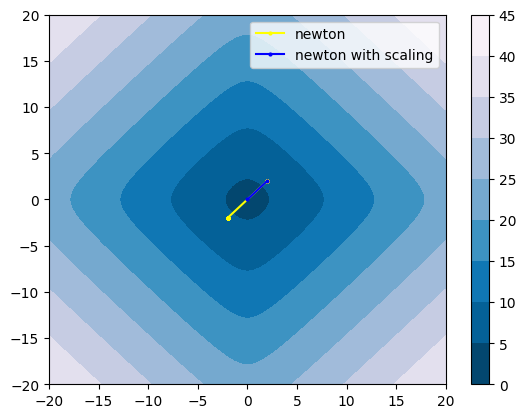

In [9]:
##Plotting Trajectory
x = np.linspace(-20, 20, 1000)
y = np.linspace(-20, 20, 1000)
X, Y = np.meshgrid(x, y)
Z = q((X,Y))
p = plt.contourf(X,Y,Z,cmap=cm.PuBu_r)
cbar = plt.colorbar(p)
xcordinates1 = [xk1[0] for xk1 in xks1]
ycordinates1 = [xk1[1] for xk1 in xks1]
plt.plot(xcordinates1, ycordinates1, color='yellow', marker = 'o', markersize = 2, label = 'newton')
xcordinates2 = [xk1[0] for xk1 in xks2]
ycordinates2 = [xk1[1] for xk1 in xks2]
plt.plot(xcordinates2, ycordinates2, color='blue',  marker = 'o', markersize = 2, label = 'newton with scaling')
plt.legend()
plt.show()

**3. Compare the number of iterations obtained for the two variants of Newton’s method in the previous part with
that of the gradient descent algorithm (without scaling) with backtracking line search (implemented in previous
lab) using the starting point (2, 2). For backtracking line search, use $α_0 = 1$, ρ = 0.5, γ = 0.5. Also, compare
the minimizer and minimum objective function value in each case. Comment on your observations**

In [15]:
def get_alpha(x, alpha0, rho, gamma):
  alpha = alpha0
  pk = -1*gradient_q(x)
  while q(x + alpha*pk) > (q(x) + gamma*alpha*gradient_q(x)@pk):
    alpha = rho*alpha
  return alpha

def gradient_descent_with_backtracking(x0, tau, rho, gamma, alpha0):
  x = np.copy(x0)
  count = 0
  pk = -1*gradient_q(x)
  xs = []
  xs.append(x)
  while norm(pk)>tau:
    alpha =  get_alpha(x, alpha0, rho, gamma)
    x = x + alpha*pk
    pk = -1*gradient_q(x)
    count += 1
    xs.append(x)
  return count, x, q(x),xs

In [16]:
x0 = np.array([2,2])
tau = 1e-9
alpha0 = 1
gamma = 0.5
rho= 0.5

count1, final_xk1, final_val1, xks1 = gradient_descent_with_backtracking(x0, tau, rho, gamma, alpha0)

print("iterations = " ,count1)
print("final minimizer  = ",final_xk1)
print("final value = ", final_val1)


iterations =  32
final minimizer  =  [7.62525638e-10 7.62525638e-10]
final value =  4.0


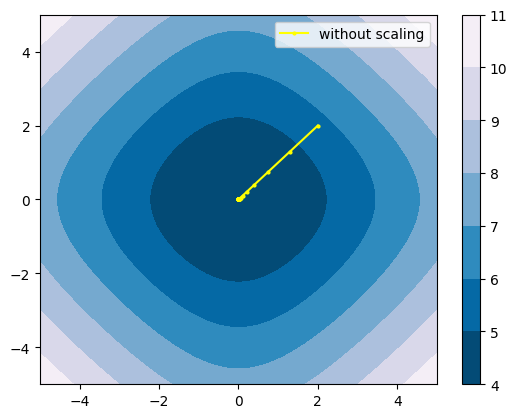

In [17]:
x = np.linspace(-5, 5, 1000)
y = np.linspace(-5, 5, 1000)
X, Y = np.meshgrid(x, y)
Z = q((X,Y))
p = plt.contourf(X,Y,Z,cmap=cm.PuBu_r)
cbar = plt.colorbar(p)
xcordinates1 = [xk1[0] for xk1 in xks1]
ycordinates1 = [xk1[1] for xk1 in xks1]
plt.plot(xcordinates1, ycordinates1, color='yellow', marker = 'o', markersize = 2, label = 'without scaling')
plt.legend()
plt.show()

#OBSERVATIONS
 Using gradient descent method , it took 32 iterations to reach the minimum value (0,0) with 4 as the minimizer whereas the newton method with scaling took one iteration to reach the minimizer and the normal newton method took infinite time

**4. Consider $η_k = 1$, ∀k = 1, 2, . . . in Algorithm 2. With starting point $x_0 = (16, 16)$ and a stopping tolerance
$τ = 10^{−9}$
, find the number of iterations taken by Newton’s method. Compare the number of iterations with that
taken by Newton’s method (with backtracking line search) in Algorithm 2. Note the minimizer and minimum
objective function value in each case. Comment on your observations. Plot the level sets of the function q(x)
and also plot the trajectory of the optimization on the same plot for both the Newton’s method with and without
backtracking line search.**


In [18]:
def newton_method(x0, tau, max_iter):
  x = np.copy(x0)
  count = 0
  pk = gradient_q(x)
  xs = []
  xs.append(x)
  while norm(pk)>tau:
    Dk = dk_q(x)
    x = x - Dk@pk
    pk = gradient_q(x)
    xs.append(x)
    count += 1
    if count>max_iter:
      break
  return count, x, q(x), xs


# INITIAL VALUES
x0 = np.array([16,16])
tau = 1e-9
alpha0 = 1
gamma = 0.5
rho= 0.5


count1, final_x1, final_val1, xs1= newton_method(x0, tau, 1e15)
print("iterations = " ,count1)
print("final minimizer  = ",final_xk1)
print("final value = ", final_val1)
print("type = ", 'newton')

print('--------------------------------------------------------')

count2, final_x2, final_val2, xs2= newton_method_with_backtracking(x0, tau, alpha0, rho, gamma)
print("iterations = " ,count2)
print("final minimizer  = ",final_x2)
print("final value = ", final_val2)
print("type = ", 'newton with backtracking')

iterations =  5
final minimizer  =  [7.62525638e-10 7.62525638e-10]
final value =  inf
type =  newton
--------------------------------------------------------
iterations =  16
final minimizer  =  [8.34468061e-16 8.34468061e-16]
final value =  4.0
type =  newton with backtracking


<ipython-input-2-3088df7f25f6>:9: RuntimeWarning: overflow encountered in double_scalars
  return np.array([x1/np.sqrt(x1**2 + 4), x2/np.sqrt(x2**2 + 4)])
<ipython-input-2-3088df7f25f6>:4: RuntimeWarning: overflow encountered in double_scalars
  return np.sqrt(x1**2 + 4) + np.sqrt(x2**2 + 4)


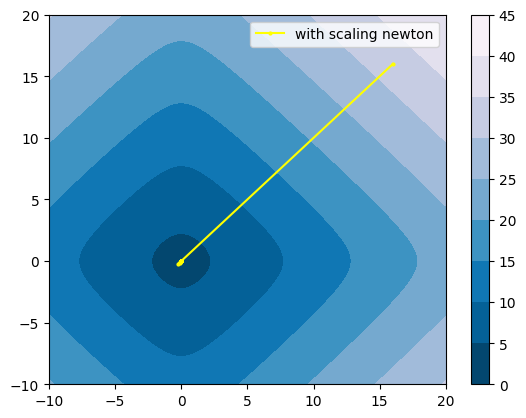

In [19]:

#Plot
x = np.linspace(-10, 20, 1000)
y = np.linspace(-10, 20, 1000)
X, Y = np.meshgrid(x, y)
Z = q((X,Y))
p = plt.contourf(X,Y,Z,cmap=cm.PuBu_r)
cbar = plt.colorbar(p)
xcordinates2 = [xk2[0] for xk2 in xs2]
ycordinates2 = [xk2[1] for xk2 in xs2]
plt.plot(xcordinates2, ycordinates2, color='yellow', marker = 'o', markersize = 2, label = 'with scaling newton')
plt.legend()
plt.show()

 **It is seen that the backtracking newton method took 16 iterations to converge to optimal point.**

**5. Compare the number of iterations obtained for the two variants of Newton’s method in the previous part with
that of the gradient descent algorithm (without scaling) with backtracking line search (implemented in previous
lab) using the starting point (16, 16). For backtracking line search, use α0 = 1, ρ = 0.5, γ = 0.5. Also, compare
the minimizer and minimum objective function value in each case. Comment on your observations.**


iterations =  46
final minimizer  =  [1.19947822e-09 1.19947822e-09]
final value =  4.0
type =  gd backtracking without scaling


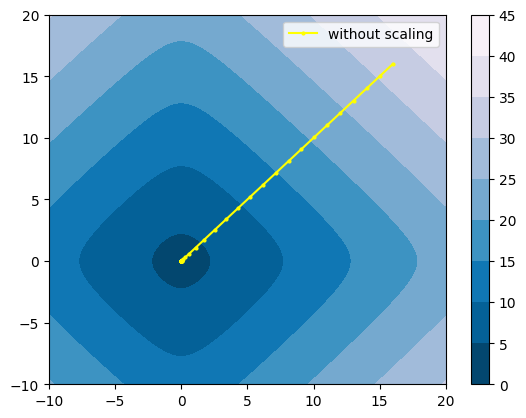

In [14]:
x0 = np.array([16,16])
tau = 1e-9
alpha0 = 1
gamma = 0.5
rho= 0.5

count1, final_xk1, final_val1, xks1 = gradient_descent_with_backtracking(x0, tau, rho, gamma, alpha0)


print("iterations = " ,count1)
print("final minimizer  = ",final_xk1)
print("final value = ", final_val1)
print("type = ", 'gd backtracking without scaling')


# PLOT
x = np.linspace(-10, 20, 1000)
y = np.linspace(-10, 20, 1000)
X, Y = np.meshgrid(x, y)
Z = q((X,Y))
p = plt.contourf(X,Y,Z,cmap=cm.PuBu_r)
cbar = plt.colorbar(p)
xcordinates1 = [xk1[0] for xk1 in xks1]
ycordinates1 = [xk1[1] for xk1 in xks1]
plt.plot(xcordinates1, ycordinates1, color='yellow', marker = 'o', markersize = 2, label = 'without scaling')
plt.legend()
plt.show()

#OBSERVATION
minimizer = (0,0) and minimum value = 4. Without scaling gradient descent backtracking took 46 iterations whereas newtons method with scaling had 16 iterations to reach the minimizer.